# AIAS/AI Capstone Spring 2022 Lab 1 C Programming Test

## Preface
Welcome to the **"AI Computing Architecture and System"** and **"AI Chip Software Capstone Project"** course. One of the prerequisites to take this course is to have at least intermediate-level C programming skills. This homework helps you to understand your level of C programming proficiency. If this homework is too difficult for you and you cannot finish it in time, I recommend you to take a course that covers beginner-level C programming before you take this course. 

* Save a copy of the above Colab notebook and rename it to “C_Programming_Test_\<your student ID\>_\<your name\>.ipynb” (e.g. C_Programming_Test_N26094922_高士鈞.ipynb)
* Please submit your homework with the colab link through [Playlab Homework Submission System](https://playlab.computing.ncku.edu.tw:8000/).

A large part of this test is courtesy of the Berkely CS61C course. Please try to finish this test on your own. You may search for any references that might help you refresh your C programming knowledge. However, please do not copy the answers from any website or peers. The key value of this test is to help you understand whether you have enough C programming background to take this course. 

## Time Yourself
Question 0. Before you start, remember to time how long it takes you to complete this homework. When you are done, come back and tell us the total time that you spent. 

In [36]:
TOTAL_TIME = 47   ##  Modify 99999 in minutes

print("I spent {} minutes to complete this test.".format(TOTAL_TIME))
if (TOTAL_TIME > 90):
  print("I need to take another entry-level course such as \"Computational Thinking and Problem Solving\" first!")
else:
  print("I think I am ready to take this course!")

I spent 47 minutes to complete this test.
I think I am ready to take this course!


## C Programming Exercise 1: Simple C Program

In this exercise, we will see an example of preprocessor macro definitions. Macros can be a messy topic, but in general the way they work is that before a C file is compiled, all macro constant names are replaced exactly with the value they refer to.

In the scope of this exercise, we will be using macro definitions exclusively as global constants. Here we define CONSTANT_NAME to refer to literal_value (an integer literal). Note that there is only a space separating name from value.


In [ ]:
%%writefile test.c

#include <stdio.h>

/* Only change any of these 4 values */
#define V0 3
#define V1 0
#define V2 0
#define V3 1

int main(void) {
	int a;
	char *s;

	/* This is a print statement. Notice the little 'f' at the end!
	It might be worthwhile to look up how printf works for your future
	debugging needs... */
	printf("Playlab Courses:\n====================\n");

	/* for loop */
	for(a=0; a<V0; a++) {
		printf("Great ");
	}
	printf("\n");

	/* switch statement */
	switch(V1) {
		case 0:		printf("CTPS\n");
		case 1: 	printf("AICA\n");	break;
		case 2: 	printf("AICA\n");
		case 3: 	printf("AIChatbot\n");		break;
		case 4:		printf("AIAS\n");	break;
		case 5:		printf("Goodbye\n");
		default:	printf("I don't know what to teach yet!\n");
	}

	/* ternary operator */
	s = (V3==1) ? "Has" : "Has No";

	/* if statement */
	if(V2) {
		printf("\n%s Course!\n",s);
	} else  {
		printf("\n%s Students!\n",s);
	}
    
	return 0;
}



Writing test.c


In [ ]:
%%script bash
gcc -o test test.c

./test

Playlab Courses:
Great Great Great 
CTPS
AICA

Has Students!


First compile and run the program to see what it does. Play around with the constant values of the four macros: V0 through V3. See how changing each of them changes the program output.

Your task: Modifying only these four values, make the program produce the following output.

<pre>
Playlab Courses: 
==================== 
Great Great Great 
CTPS
AICA

Has Students!
</pre>

## C Programming Exercise 2: Pointers and Structures in C

Here's one to help you in your interviews. In the following C program file, ll_cycle.c, complete the function ll_has_cycle() to implement the following algorithm for checking if a singly-linked list has a cycle.

Start with two pointers at the head of the list. We'll call the first one tortoise and the second one hare.
Advance hare by two nodes. If this is not possible because of a null pointer, we have found the end of the list, and therefore the list is acyclic.
Advance tortoise by one node. (A null pointer check is unnecessary. Why?)
If tortoise and hare point to the same node, the list is cyclic. Otherwise, go back to step 2.
After you have correctly implemented ll_has_cycle(), the program you get when you compile ll_cycle.c will tell you that ll_has_cycle() agrees with what the program expected it to output.

Hint: There are two common ways that students usually write this function. They differ in how they choose to encode the stopping criteria. If you do it one way, you'll have to account for a special case in the beginning. If you do it another way, you'll have some extra NULL checks, which is OK. The previous 2 sentences are meant to urge you to not stress over cleanliness. If they don't help you, just ignore them. The point of this exercise is to make sure you know how to use pointers.

Here's a [Wikipedia](https://en.wikipedia.org/wiki/Cycle_detection#Floyd.27s_Tortoise_and_Hare) article on the algorithm and why it works. Don't worry about it if you don't completely understand it. We won't test you on this.

By the way, the pointers are called "tortoise" and "hare" because the tortoise pointer is incremented slowly (like a tortoise, which moves slowly) and the hare pointer is incremented quickly (twice as fast as the tortoise, like a hare AKA a rabbit, which moves quickly).

As a closing note, [the story of the tortoise and the hare](http://read.gov/aesop/025.html) is always relevant, especially in CS61C. Writing your C programs slowly and steadily, using debugging programs like CGDB, is what will win you the race.


In [ ]:
%%writefile ll_cycle.c

#include <stdio.h>

typedef struct node {
	int value;
	struct node *next;
} node;

int ll_has_cycle(node *head) {
	if(head == 0){
		return 0;
	}
	node *p1 = head, *p2 = head;
	while(1){
		if(p2 -> next == 0)
			return 0;
		p2 = p2 -> next;
		if(p2 -> next == 0)
			return 0;
		p2 = p2 -> next;
		p1 = p1 -> next;
		if(p1 == p2)
			return 1;
	}
	return 0;
}

void test_ll_has_cycle(void) {
	int i;
	node nodes[25]; //enough to run our tests
	for(i=0; i < sizeof(nodes)/sizeof(node); i++) {
		nodes[i].next = 0;
		nodes[i].value = 0;
	}
	nodes[0].next = &nodes[1];
	nodes[1].next = &nodes[2];
	nodes[2].next = &nodes[3];
	printf("Checking first list for cycles. There should be none, ll_has_cycle says it has %s cycle\n", ll_has_cycle(&nodes[0])?"a":"no");
  
	nodes[4].next = &nodes[5];
	nodes[5].next = &nodes[6];
	nodes[6].next = &nodes[7];
	nodes[7].next = &nodes[8];
	nodes[8].next = &nodes[9];
	nodes[9].next = &nodes[10];
	nodes[10].next = &nodes[4];
	printf("Checking second list for cycles. There should be a cycle, ll_has_cycle says it has %s cycle\n", ll_has_cycle(&nodes[4])?"a":"no");
  
	nodes[11].next = &nodes[12];
	nodes[12].next = &nodes[13];
	nodes[13].next = &nodes[14];
	nodes[14].next = &nodes[15];
	nodes[15].next = &nodes[16];
	nodes[16].next = &nodes[17];
	nodes[17].next = &nodes[14];
	printf("Checking third list for cycles. There should be a cycle, ll_has_cycle says it has %s cycle\n", ll_has_cycle(&nodes[11])?"a":"no");
  
	nodes[18].next = &nodes[18];
	printf("Checking fourth list for cycles. There should be a cycle, ll_has_cycle says it has %s cycle\n", ll_has_cycle(&nodes[18])?"a":"no");
  
	nodes[19].next = &nodes[20];
	nodes[20].next = &nodes[21];
	nodes[21].next = &nodes[22];
	nodes[22].next = &nodes[23];
	printf("Checking fifth list for cycles. There should be none, ll_has_cycle says it has %s cycle\n", ll_has_cycle(&nodes[19])?"a":"no");
  
	printf("Checking length-zero list for cycles. There should be none, ll_has_cycle says it has %s cycle\n", ll_has_cycle(NULL)?"a":"no");
}

int main(void) {
  test_ll_has_cycle();
  return 0;
}



Overwriting ll_cycle.c


In [ ]:
%%script bash
gcc -o test ll_cycle.c

./test

Checking first list for cycles. There should be none, ll_has_cycle says it has no cycle
Checking second list for cycles. There should be a cycle, ll_has_cycle says it has a cycle
Checking third list for cycles. There should be a cycle, ll_has_cycle says it has a cycle
Checking fourth list for cycles. There should be a cycle, ll_has_cycle says it has a cycle
Checking fifth list for cycles. There should be none, ll_has_cycle says it has no cycle
Checking length-zero list for cycles. There should be none, ll_has_cycle says it has no cycle


## C Programming Test
Please take the [C Programming Practice Test](https://www.indiabix.com/online-test/c-programming-test/11) and paste the screenshot of the test result as the follows here.

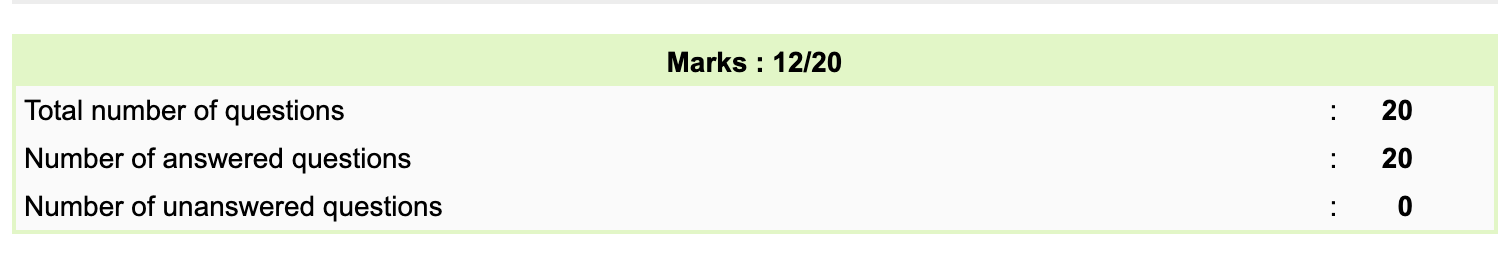

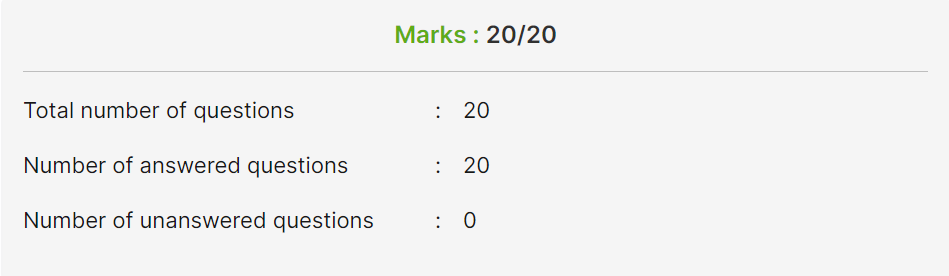